In [20]:
from bs4 import BeautifulSoup
import requests, pandas as pd, numpy as np, re
import html5lib
from datetime import date
import re
import matplotlib.pyplot as plt

### PART 1: DATA SCRAPING AND PREPARATION ###
#STEP 1: SCRAPE YOUR COMPETITOR'S DATA

r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares')
# Use BeautifulSoup to parse the GET response
root = BeautifulSoup(r.content, features="lxml")
#table = root.find('table', {'class': 'table table-striped'})
#Table name was changed so using the code below instead of the code above
table = root.find('table', {'class': 'table table-striped table-responsive-md'})

#get dataframe
h = pd.read_html(str(table))
df = h[0]

#rename columns
df = df.rename(columns={'Unnamed: 0': 'rank', 'Unnamed: 1': 'x_class', 'Unnamed: 2': 'Date', 'Unnamed: 7': 'Movie'})
#start index from 1 instead of 0
df.index = np.arange(1,len(df)+1)
df

,rank,x_class,Date,Region,Start,Maximum,End,Movie
1,1,X28.0,2003/11/04,486,19:29,19:53,20:06,MovieView archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
3,3,X17.2,2003/10/28,486,09:51,11:10,11:24,MovieView archive
4,4,X17.0,2005/09/07,808,17:17,17:40,18:03,MovieView archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
6,6,X10.0,2003/10/29,486,20:37,20:49,21:01,MovieView archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
9,9,X9.0,2006/12/05,930,10:18,10:35,10:45,MovieView archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [18]:
#STEP 2: TIDY THE TOP 50 SOLAR FLARE DATA

#drop last column - axis = 1 means COLUMNS and axis = 0 means ROWS
#Movies are in the column so axis = 1
df = df.drop(['Movie'], axis = 1)
#combine the columns, then rename the column
df.insert(2,'start_datetime',df['Date'] + ' ' + df['Start'],True)
df.insert(3,'max_datetime',df['Date'] + ' ' + df['Maximum'],True)
df.insert(4,'end_datetime',df['Date'] + ' ' + df['End'],True)

#Since we combined the dates and times, we don't need these columns anymore.
df = df.drop(['Start'], axis = 1)
df = df.drop(['Maximum'], axis = 1)
df = df.drop(['End'], axis = 1)
df = df.drop(['Date'], axis = 1)

#convert the 'Date' column to datetime
for index, row in df.iterrows():
    t = row['start_datetime']
    #24:00 is not supported so change it to 23:59
    if '24:00' in str(t):
        line = re.sub(r'(\d{2}:\d{2})', "23:59", str(t))
        x = pd.to_datetime(line , format='%Y/%m/%d')
        df.at[index, 'start_datetime'] = x
    else:
        #convert to datetime
        x = pd.to_datetime(str(t), format='%Y/%m/%d')
        #input the datetime to the column 'start_datetime'
        df.at[index, 'start_datetime'] = x

    t = row['max_datetime']
    if '24:00' in str(t):
        line = re.sub(r'(\d{2}:\d{2})', "23:59", str(t))
        x = pd.to_datetime(line , format='%Y/%m/%d')
        df.at[index, 'max_datetime'] = x
    else:
        x = pd.to_datetime(str(t), format='%Y/%m/%d')
        df.at[index, 'max_datetime'] = x

    t = row['end_datetime']
    if '24:00' in str(t):
        print(str(t))
        line = re.sub(r'(\d{2}:\d{2})', "23:59", str(t))
        x = pd.to_datetime(line , format='%Y/%m/%d')
        df.at[index, 'end_datetime'] = x
    else:
        x = pd.to_datetime(str(t), format='%Y/%m/%d')
        df.at[index, 'end_datetime'] = x

#store SpaceWeatherLive Data
spacedf = df
df

,rank,x_class,start_datetime,max_datetime,end_datetime,Region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [23]:
#STEP 3: SCRAPE THE NASA DATA
#STEP 4: TIDY THE NASA TABLE

r = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html')
root = BeautifulSoup(r.content, features="lxml")
table = root.find('pre')
#slice the table string to remove the unnecessary strings in the beginning and end
table = str(table)[806:-106]
#split each new line
table = table.split('\n')
#get dataframe of the table
df = pd.DataFrame(table)

#extract the correct regex from the long string and add it to the
#appropriate columns (I'm creating the columns as I'm calling them)
#df[0] contains the long string
year = df[0].str.extract(r'(\d{4})', expand=True)
df["start_date"] = df[0].str.extract(r'(\d{4}/\d{2}/\d{2})', expand=True)
df[0] = df[0].str.replace(r'(\s*\d{4}/\d{2}/\d{2}\s*)', '', n=1)

df["start_time"] = df[0].str.extract(r'(\d{2}:\d{2})', expand=True)
df[0] = df[0].str.replace(r'(\d{2}:\d{2}\s*)', '', n=1)

df["end_date"] = year + '/' + df[0].str.extract(r'^(\d{2}/\d{2})', expand=True)
df[0] = df[0].str.replace(r'(\d{2}/\d{2}\s*)', '', n=1)

df["end_time"] = df[0].str.extract(r'(\d{2}:\d{2})', expand=True)
df[0] = df[0].str.replace(r'(\d{2}:\d{2}\s*)', '', n=1)
df[0] = df[0].str.replace(r'(<a href=.+?(?=>))\s*', '', n=1)
df[0] = df[0].str.replace(r'>\s*', '', n=1)

df["start_frequency"] = df[0].str.extract(r'(\d*)', expand=True)
df[0] = df[0].str.replace(r'(\d*[</a>]*\s*)', '', n=1)
df[0] = df[0].str.replace(r'(<a href=.+?(?=>))\s*', '', n=1)
df[0] = df[0].str.replace(r'>\s*', '', n=1)

df["end_frequency"] = df[0].str.extract(r'(\d*)', expand=True)
df[0] = df[0].str.replace(r'(>*\d*[</a>]*\s*)', '', n=1)

df[0] = df[0].str.replace(r'(-*\s*/*:*)*', '', n=1)
df["flare_location"] = df[0].str.extract(r'(^[A-Z][0-9a-zA-Z]*)', expand=True)
df[0] = df[0].str.replace(r'([A-Z0-9a-z]*)\s*', '', n=1)

df["flare_region"] = df[0].str.extract(r'^(\d+)', expand=True)
df[0] = df[0].str.replace(r'(\d*)\s*', '', n=1)
df[0] = df[0].str.replace(r'(-*\s*/*:*)*', '', n=1)

df["flare_classification"] = df[0].str.extract(r'^([A-Z0-9]*.\d)', expand=True)
df[0] = df[0].str.replace(r'([A-Z0-9]*.\d)\s*', '', n=1)

df["cme_date"] = year + '/' + df[0].str.extract(r'>(\d{2}/\d{2})</a>', expand=True)
df[0] = df[0].str.replace(r'(-*\s*/*:*)*', '', n=1)
df[0] = df[0].str.replace(r'(<a href=.+?(?=>))\s*', '', n=1)
df[0] = df[0].str.replace(r'(>\d*/\d*</a>\s*)', '', n=1)

df["cme_time"] = df[0].str.extract(r'(\d*:\d*)', expand=True)
df[0] = df[0].str.replace(r'(\d*:\d*\s*)', '', n=1)
#extract cme_angle then remove it from the long string
df["cme_angle"] = df[0].str.extract(r'(Halo|\d+)', expand=True)
df[0] = df[0].str.replace(r'(Halo|\d+)\s*', '', n=1)

#store only the widths with '>' symbol into the width variable
width = df[0].str.extract(r'(^&gt;)', expand=True)
df["cme_width"] = df[0].str.extract(r'[&gt;]*(\d+)', expand=True)
df[0] = df[0].str.replace(r'([&gt;]*\d+\s*)', '', n=1)
df[0] = df[0].str.replace(r'(<a href=.+?(?=>))', '', n=1)

df["cme_speed"] = df[0].str.extract(r'>(\d+)', expand=True)
df[0] = df[0].str.replace(r'(>\d*</a>\s*)', '', n=1)
df[0] = df[0].str.replace(r'(<a href=.+?(?=>))\s*', '', n=1)

df["plot"] = df[0].str.extract(r'>*([A-Z]+)', expand=True)
df[0] = df[0].str.replace(r'>([A-Z]+)</a>\s*', '', n=1)

for index, row in df.iterrows():
        #add the 'is_halo' column by checking if the 'cme_angle' row is
        #equal to 'Halo'
        df.at[index, 'is_halo'] = row["cme_angle"] == 'Halo'
        #if 'cme_angle' is 'Halo', replace it with NaN
        if row['cme_angle'] == 'Halo':
            df.at[index, 'cme_angle'] = np.NaN
        #'BACK', 'back', 'Back' are all considered NaN
        if row['flare_location'] == 'BACK' or row['flare_location'] == 'back' or row['flare_location'] == 'Back':
            df.at[index, 'flare_location'] = np.NaN

#if the width column contains the '>' symbol, then set that row to true
#else false
df.insert(17, 'width_lower_bound', width == '&gt;', True)


#new columns that will contain the combined date/time columns
df.insert(1,'start_datetime', df['start_date'] + ' ' + df['start_time'],True)
df = df.drop(['start_date'], axis = 1)
df = df.drop(['start_time'], axis = 1)

df.insert(2,'end_datetime', df['end_date'] + ' ' + df['end_time'],True)
df = df.drop(['end_date'], axis = 1)
df = df.drop(['end_time'], axis = 1)

df.insert(8,'cme_datetime', df['cme_date'] + ' ' + df['cme_time'],True)
df = df.drop(['cme_date'], axis = 1)
df = df.drop(['cme_time'], axis = 1)

#convert some columns to datetime
for index, row in df.iterrows():
    t = row['start_datetime']
    x = pd.to_datetime(str(t) , format='%Y/%m/%d')
    df.at[index, 'start_datetime'] = x

    t = row['end_datetime']
    if '24:00' in str(t):
        line = re.sub(r'(\d{2}:\d{2})', "23:59", str(t))
        x = pd.to_datetime(line , format='%Y/%m/%d')
        df.at[index, 'end_datetime'] = x
    else:
        x = pd.to_datetime(str(t), format='%Y/%m/%d')
        df.at[index, 'end_datetime'] = x

    t = row['cme_datetime']
    if '24:00' in str(t):
        line = re.sub(r'(\d{2}:\d{2})', "23:59", str(t))
        x = pd.to_datetime(line , format='%Y/%m/%d')
        df.at[index, 'cme_datetime'] = x
    else:
        x = pd.to_datetime(str(t), format='%Y/%m/%d')
        df.at[index, 'cme_datetime'] = x

#clean up datframe
for index, row in df.iterrows():
    if row['plot'] == 'EP':
        df.at[index, 'plot'] = 'PHTX'
    if row['flare_region'] == 'FILA':
        df.at[index,'flare_region'] = np.Nan
    if row['flare_location'] 
#delete first column which originally contained the long string
df = df.drop(df.columns[0], axis = 1)

df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,PHTX,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,PHTX,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360,785,PHTX,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,PHTX,False,False


In [25]:
#PART 2
#QUESTION 1: REPLICATION

#separate the letters and the numbers
#letters go into temp_first and numbers go into temp_second
for index, row in df.iterrows():
    s = str(row['flare_classification'])
    if (s[0] != 'n'):
        df.at[index, 'temp_first'] = s[0]
        df.at[index, 'temp_second'] = s[1:]

#turn the numbers into floats because they were strings before
df['temp_second'] = df.temp_second.astype(float)
#sort the numbers
df = df.sort_values('temp_first', axis = 0, ascending = False)

i = 0
i2 = 0
realIndex = 0
#create separate dataframes for each letter
for index, row in df.iterrows():
    if row['temp_first'] == 'X':
        i2 = realIndex
        realIndex = realIndex + 1
        x = df[i:realIndex]
    elif row['temp_first'] == 'M':
        i = realIndex
        realIndex = realIndex + 1
        m = df[i2 + 1:realIndex]
    elif row['temp_first'] == 'C':
        i2= realIndex
        realIndex = realIndex + 1
        c = df[i + 1:realIndex]
    elif row['temp_first'] == 'B':
        i= realIndex
        realIndex = realIndex + 1
        b = df[i2 + 1:realIndex]
    #no A classifications 
    else:
        #store the NaN values
        realIndex = realIndex + 1
        n = df[i + 1:realIndex]

#sort the numbers in each category 
x = x.sort_values('temp_second', ascending=False)
m = m.sort_values('temp_second', ascending=False)
c = c.sort_values('temp_second', ascending=False)
b = b.sort_values('temp_second', ascending=False)
n = n.sort_values('temp_second', ascending=False)

#empty the original dataframe and append the sorted rows
df = df.iloc[0:0]
df = df.append(x)
df = df.append(m)
df = df.append(c)
df = df.append(b)
df = df.append(n)

df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,temp_first,temp_second
242,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,X,28.0
119,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,X,20.0
234,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,X,17.0
128,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,X,14.0
235,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,X,10.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,X,9.4
330,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,X,9.0
238,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,X,8.3
290,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False,X,7.1
360,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,False,X,6.9


In [26]:
spacedf

#My data is pretty similar to the SpaceWeatherLive Data. Almost all of the top classifications
#in my NASA data is contained in the SpaceWeatherLive Data, but not all of the
#SpaceWeatherLive Data is in the NASA data.

,rank,x_class,start_datetime,max_datetime,end_datetime,Region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [29]:
#Question 2
#MY function aims to match the closest flare_classification from the SpaceWeatherLive Data with the NASA data.
#The function matches the closest number to the SpaceWeatherLive Data row and then removes that row from the NASA data 
#so that it can not get picked again in the next iteration. 

df.index = np.arange(1,len(df)+1)

#split the numbers with the letters in SpaceWeatherLive Data
for index, row in spacedf.iterrows():
    s = str(row['x_class'])
    spacedf.at[index, 'temp_first'] = s[0]
    spacedf.at[index, 'temp_second'] = s[1:]

nasadf = df
spacedf['temp_second'] = spacedf.temp_second.astype(float)

def best_matching(nasadf, spacedf):
    for index, row in spacedf.iterrows():
        n = row['temp_second']
        iterator = nasadf.iterrows()
        iteratorcopy = nasadf.iterrows()
        iteratorcopy.__next__()
        for index2, row2 in iterator:
            nextIndex, nextRow = iteratorcopy.__next__()
            #if the NASA row and SpaceWeatherLive row has the same number, then rank it
            if row2['temp_second'] == n:
                nasadf = nasadf.drop(index2, axis = 0)
                df.at[index2, 'space_weather_live_ranking'] = index
                break
            elif n > row2['temp_second']:
                df.at[index2, 'space_weather_live_ranking'] = index
                nasadf = nasadf.drop(index2, axis = 0)
                break
            elif n < row2['temp_second'] and n > nextRow['temp_second']:
                print('in the elif!')
                if abs(n - row2['temp_second']) < abs(n - nextRow['temp_second']):
                    df.at[index2, 'space_weather_live_ranking'] = index
                    nasadf = nasadf.drop(index2, axis = 0)
                    break
                else:
                    df.at[index2, 'space_weather_live_ranking'] = index
                    nasadf = nasadf.drop(index2, axis = 0)
                    nasadf = nasadf.drop(nextIndex, axis = 0)
                    break

best_matching(nasadf, spacedf)
df

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,temp_first,temp_second,space_weather_live_ranking
1,2003-11-04 20:00:00,2003-11-04 23:59:00,10000,200,S19W83,10486,X28,2003-11-04 19:54:00,NaN,360,2657,PHTX,True,False,X,28.0,1.0
2,2001-04-02 22:05:00,2001-04-03 02:30:00,14000,250,N19W72,9393,X20,2001-04-02 22:06:00,261,244,2505,PHTX,False,False,X,20.0,2.0
3,2003-10-28 11:10:00,2003-10-29 23:59:00,14000,40,S16E08,10486,X17,2003-10-28 11:30:00,NaN,360,2459,PHTX,True,False,X,17.0,3.0
4,2001-04-15 14:05:00,2001-04-16 13:00:00,14000,40,S20W85,9415,X14,2001-04-15 14:06:00,245,167,1199,PHTX,False,False,X,14.0,4.0
5,2003-10-29 20:55:00,2003-10-29 23:59:00,11000,500,S15W02,10486,X10,2003-10-29 20:54:00,NaN,360,2029,PHTX,True,False,X,10.0,5.0
6,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360,1556,PHTX,True,False,X,9.4,6.0
7,2006-12-05 10:50:00,2006-12-05 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,NaN,PHTX,False,False,X,9.0,7.0
8,2003-11-02 17:30:00,2003-11-03 01:00:00,12000,250,S14W56,10486,X8.3,2003-11-02 17:30:00,NaN,360,2598,PHTX,True,False,X,8.3,8.0
9,2005-01-20 07:15:00,2005-01-20 16:30:00,14000,25,N14W61,10720,X7.1,2005-01-20 06:54:00,NaN,360,882,PHTX,True,False,X,7.1,9.0
10,2011-08-09 08:20:00,2011-08-09 08:35:00,16000,4000,N17W69,11263,X6.9,2011-08-09 08:12:00,NaN,360,1610,PHTX,True,False,X,6.9,10.0


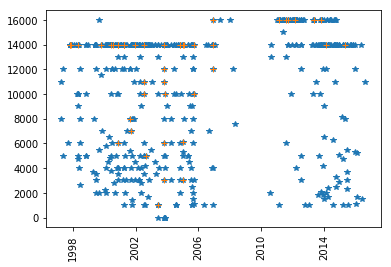

In [30]:
#store the top fifty rows into another dataframe 
fifty = df.sort_values('space_weather_live_ranking')
fifty = fifty[0:50]

plt.xticks(rotation='vertical')
for index, row in df.iterrows():
    if row['start_frequency'] == '':
        df.at[index,'start_frequency'] = 0

df['start_frequency'] = df.start_frequency.astype(np.int64)
plt.plot(df['start_datetime'], df['start_frequency'], '*')

fifty['start_frequency'] = fifty.start_frequency.astype(np.int64)
plt.plot(fifty['start_datetime'], fifty['start_frequency'], '+')

plt.show()

#The green '*'s are all the rows from df. 
#The yellow '+'s are the top fifty rows from my function.
#The x-axis is the start date and the y axis is the start frequency.

#The intent of my plot is to show any relationships between the start time of the solar flares
#and the staring frequencies. From the plot, we can see that 14000 seems to be a common starting 
#frequency across all the years. There is a large variance because the data is spread out. There is also
#a gap between the years 2006 and 2010.